<a href="https://colab.research.google.com/github/XIOZ119/colab/blob/main/_2_3_roc_auc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
uploaded = files.upload()

Saving loan_data.csv to loan_data (2).csv


AUC: 0.598


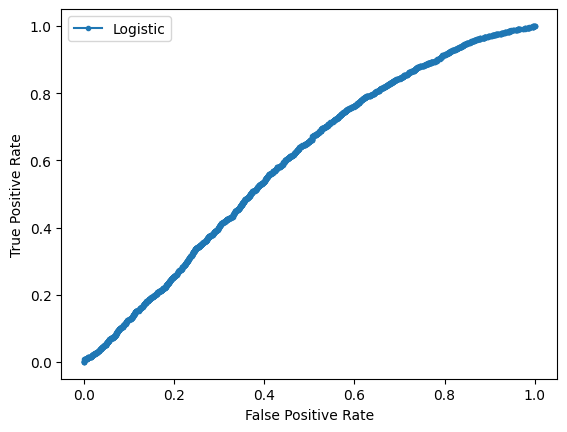

In [5]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

import io
import pandas as pd

df = pd.read_csv(io.StringIO(uploaded['loan_data (2).csv'].decode('utf-8')))

df.head()

df_encoded = pd.get_dummies(df, columns=['purpose'])

X = df_encoded.drop('not.fully.paid', axis=1)
y = df_encoded['not.fully.paid']

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import roc_curve, roc_auc_score

# 모델 예측 확률 계산
y_probs = model.predict_proba(X_test)

# 양성 클래스에 대한 확률 추출
y_probs = y_probs[:, 1]

# ROC 커브 생성
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# AUC 계산
auc = roc_auc_score(y_test, y_probs)

print('AUC: %.3f' % auc)

# ROC 커브 그리기
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# AUC 값 표시
pyplot.legend()
pyplot.show()
